In [1]:
import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats
import scipy.stats

import etroc0_benchtest

C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)



npoints is 2000
events_t is 1000


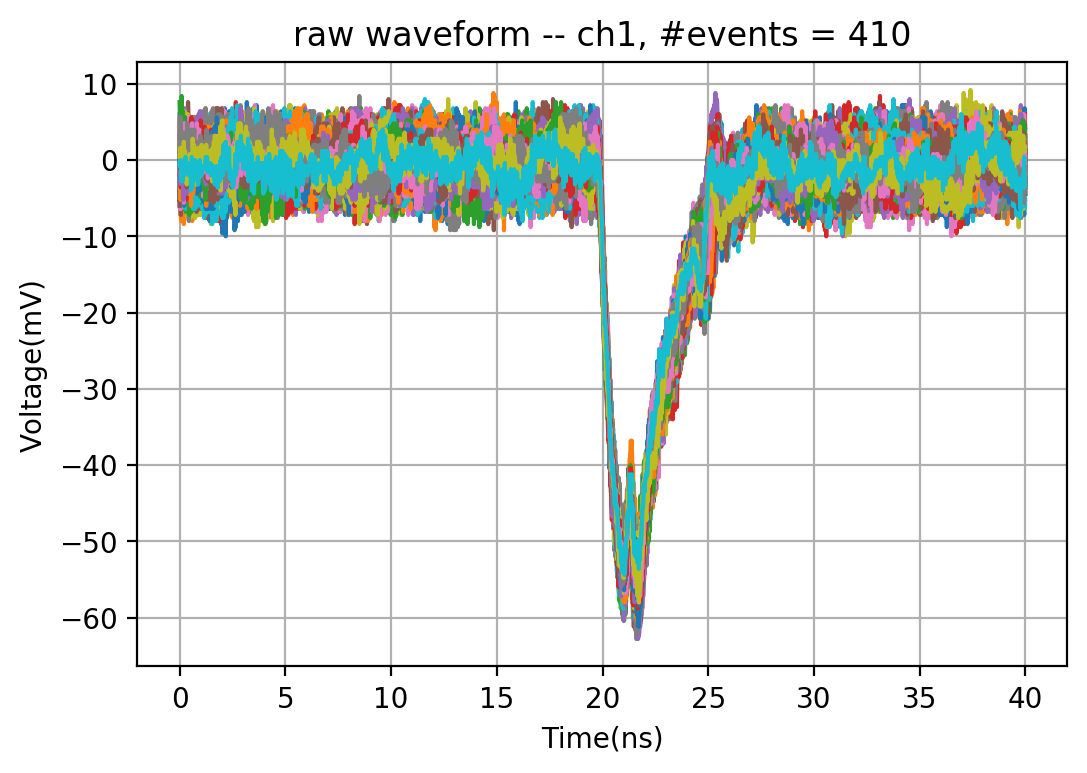

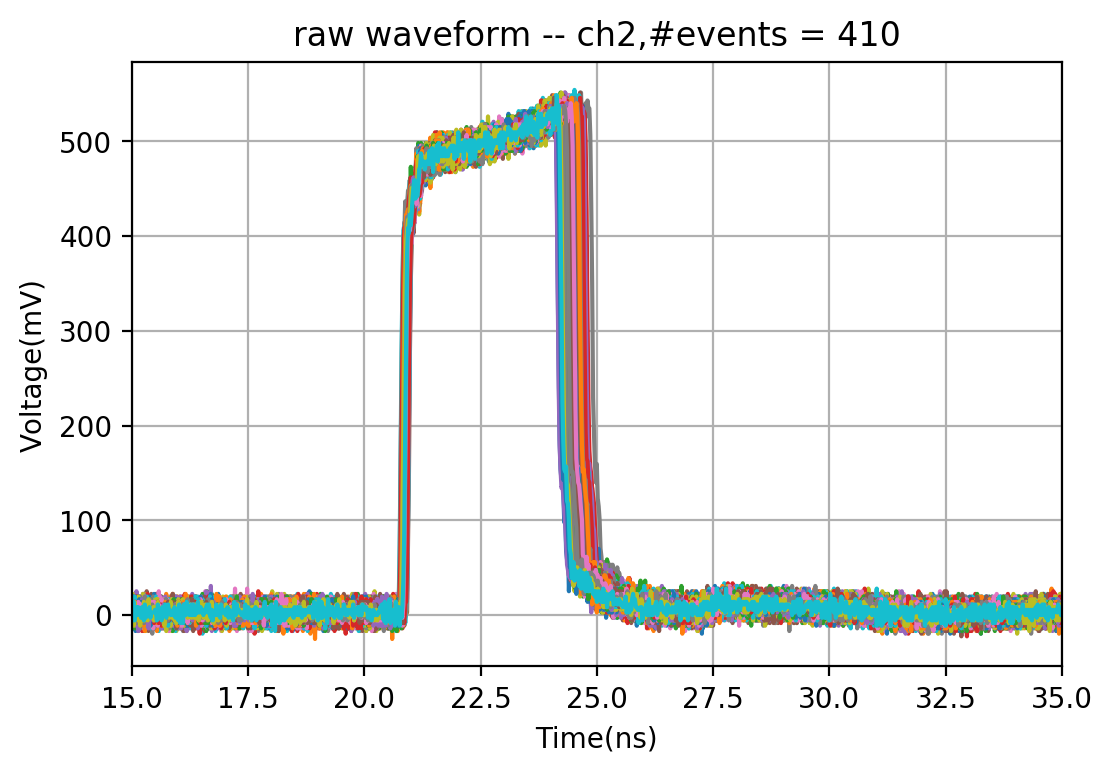

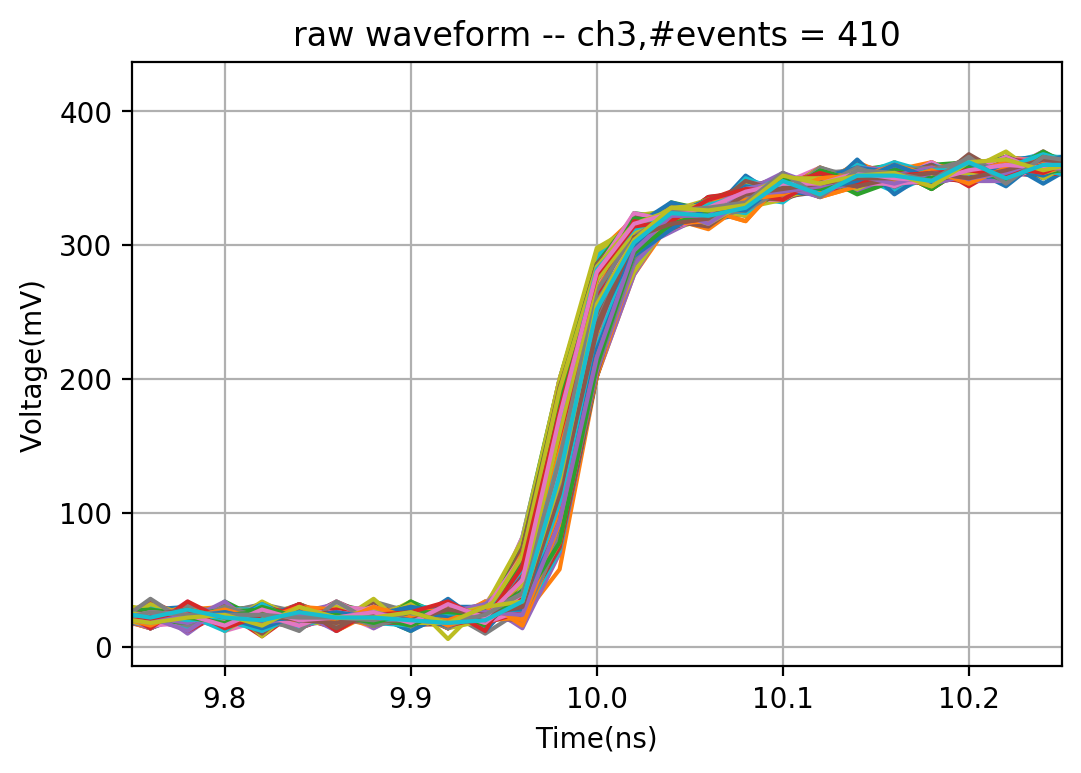

In [2]:
########## ETROC0 batch1 board1 ######################
textstr = '\n'.join((
    '-- ETROC0 batch1 board1',
    '-- baseline = DAC207',
    '-- low power, default gain'))
path ="../../../CMS ETL ASIC/ETROC0/test results/FNAL_Test/202006_ETROC0/"
file_in = 'DGDP/4fC/DGDP_DAC216_4fC_0.hdf5'
# file_in = 'DGDP/30fC/DGDP_DAC216_30fC_0.hdf5'
# file_in = 'DGDP/4fC/DGDP_DAC228_4fC_0.hdf5'


tdc_bin = 10e-3


################## check waveform  #######################

file = path + file_in

data, attrs = etroc0_benchtest.extract_dataset(file)
events_t = attrs['readout_size']
npoints = attrs['nPt']
x = np.arange(npoints)
dt = attrs['dt']

filelist = []
filelist_to_use = [file_in]
for apath in filelist_to_use:
    if apath.find(".hdf5") > -1:
        filelist.append(os.path.join(path,apath))
y_ch1 = []
y_ch2 = []
y_ch3 = []
y_ch4 = []
for item in tqdm(filelist):
    data, attrs = etroc0_benchtest.extract_dataset(item)
    for event in range(len(data[0])):
        y_ch1.append(data[0][event])
    for event in range(len(data[1])):
        y_ch2.append(data[1][event])
    for event in range(len(data[2])):
        y_ch3.append(data[2][event])
    for event in range(len(data[3])):
        y_ch4.append(data[3][event])

events_ch1 = len(y_ch1)
events_ch2 = len(y_ch2)
events_ch3 = len(y_ch3)
events_ch4 = len(y_ch4)
events_t = events_ch1
time = x*dt*1e9




# plt.plot(y_ch1[2109])
print('npoints is',npoints)
print('events_t is',events_t)

# events_t = events_t - 2500
events_t = events_t - 590


######### Plot signal with points ch1  ###########
fig, ax1 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax1.plot(time, y_ch1[ab]*1000)
# ax1.set_xlim(left=15,right=25)
ax1.grid()
ax1.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch1, #events = %d'%(events_t))
# pp.savefig(fig)
plt.show()


######### Plot signal with points ch2  ###########
fig, ax2 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax2.plot(time, y_ch2[ab]*1000)
ax2.set_xlim(left=15,right=35)
ax2.grid()
ax2.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch2,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

######### Plot signal with points ch3  ###########
fig, ax3 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax3.plot(time, y_ch3[ab]*1000)
ax3.set_xlim(left=9.75,right=10.25)
ax3.grid()
ax3.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch3,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

# ######### Plot signal with points ch4  ###########
# fig, ax4 = plt.subplots(dpi=200)
# for ab in range(0,events_t):
#     ax4.plot(time, y_ch4[ab]*1000)
# # ax2.set_xlim(left=60,right=80)
# ax4.grid()
# ax4.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
#        title='raw waveform -- ch4,#events = %d'%(events_t))
# # pp.savefig(fig)
# plt.show()

# plt.close(fig)



In [3]:
########################################## DAC 216 #################################
filelist = [
    'DGDP/3fC/DGDP_DAC216_3fC_0.hdf5',
    'DGDP/4fC/DGDP_DAC216_4fC_0.hdf5',
    'DGDP/5fC/DGDP_DAC216_5fC_0.hdf5',
    'DGDP/6fC/DGDP_DAC216_6fC_0.hdf5',
    'DGDP/8fC/DGDP_DAC216_8fC_0.hdf5',
    'DGDP/10fC/DGDP_DAC216_10fC_0.hdf5',
    'DGDP/12fC/DGDP_DAC216_12fC_0.hdf5',
    'DGDP/15fC/DGDP_DAC216_15fC_0.hdf5',
    'DGDP/20fC/DGDP_DAC216_20fC_0.hdf5',
    'DGDP/30fC/DGDP_DAC216_30fC_0.hdf5'
]

charge_DAC216_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]



file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC216_list = []
mean_t_trigger_DAC216_list = []
std_t_trigger_DAC216_list = []
t_pa_DAC216_list = []
mean_t_pa_DAC216_list = []
std_t_pa_DAC216_list = []
t_discri_le_DAC216_list = []
mean_t_discri_le_DAC216_list = []
std_t_discri_le_DAC216_list = []
t_discri_te_DAC216_list = []
mean_t_discri_te_DAC216_list = []
std_t_discri_te_DAC216_list = []
t_discri_le_notrig_DAC216_list = []
mean_t_discri_le_notrig_DAC216_list = []
std_t_discri_le_notrig_DAC216_list = []
t_discri_te_notrig_DAC216_list = []
mean_t_discri_te_notrig_DAC216_list = []
std_t_discri_te_notrig_DAC216_list = []
ampl_ch1_DAC216_list = []
mean_ampl_DAC216_list = []
std_ampl_DAC216_list = []
q_ch1_DAC216_list = []
mean_q_DAC216_list = []
std_q_DAC216_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=tdc_bin, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC216_list.append(t_trigger)
    mean_t_trigger_DAC216_list.append(mean_t_trigger)
    std_t_trigger_DAC216_list.append(std_t_trigger*1000)
    t_pa_DAC216_list.append(t_pa)
    mean_t_pa_DAC216_list.append(mean_t_pa)
    std_t_pa_DAC216_list.append(std_t_pa*1000)
    t_discri_le_DAC216_list.append(t_discri_le)
    mean_t_discri_le_DAC216_list.append(mean_t_discri_le)
    std_t_discri_le_DAC216_list.append(std_t_discri_le*1000)
    t_discri_te_DAC216_list.append(t_discri_te)
    mean_t_discri_te_DAC216_list.append(mean_t_discri_te)
    std_t_discri_te_DAC216_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC216_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC216_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC216_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC216_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC216_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC216_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC216_list.append(ampl_ch1)
    mean_ampl_DAC216_list.append(mean_ampl)
    std_ampl_DAC216_list.append(std_ampl)
    q_ch1_DAC216_list.append(q_ch1)
    mean_q_DAC216_list.append(mean_q)
    std_q_DAC216_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC216_list is\n',std_t_pa_DAC216_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC216_list is\n',std_t_discri_le_notrig_DAC216_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC216_list is\n', std_t_discri_te_notrig_DAC216_list)
print('*****************************************************************************************')
print('mean_ampl_DAC216_list is\n', mean_ampl_DAC216_list)
print('*****************************************************************************************')
print('mean_q_DAC216_list is\n', mean_q_DAC216_list)

file_num is 10



npoints at 3fC / DAC216 is 2000
events_t is 1000
threshold of trigger is 0.15280000000000002
trigger crossing searching is done
trigger mean is 9.996030000000001 ns
trigger std is 0.005562292692766058 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.473580000000002 ns
PA std is 0.07108715495784046 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 21.13115 ns
discriminator leading std is 0.05560195590084969 ns
discriminator trailing mean is 23.769689999999994 ns
discriminator trailing std is 0.13661553315783687 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.13512 ns
discriminator t_le std (trigger removed) is 0.05531532879772145 ns
discriminator t_te mean (trigger removed) is 


npoints at 4fC / DAC216 is 2000
events_t is 1000
threshold of trigger is 0.198
trigger crossing searching is done
trigger mean is 9.99479 ns
trigger std is 0.005652954979477427 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.28046 ns
PA std is 0.03566775013930665 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.896639999999998 ns
discriminator leading std is 0.033765520875590954 ns
discriminator trailing mean is 24.463859999999993 ns
discriminator trailing std is 0.12299227780637301 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.90185 ns
discriminator t_le std (trigger removed) is 0.03359579586793515 ns
discriminator t_te mean (trigger removed) is 14.469069999999995 ns
d


npoints at 5fC / DAC216 is 2000
events_t is 1000
threshold of trigger is 0.25079999999999997
trigger crossing searching is done
trigger mean is 9.994860000000001 ns
trigger std is 0.004998039615689229 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.156310000000005 ns
PA std is 0.030969079740928114 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.764830000000003 ns
discriminator leading std is 0.027036477211352626 ns
discriminator trailing mean is 24.859659999999995 ns
discriminator trailing std is 0.10347407598041182 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.76997 ns
discriminator t_le std (trigger removed) is 0.02637989954491848 ns
discriminator t_te mean (trigger 


npoints at 6fC / DAC216 is 2000
events_t is 1000
threshold of trigger is 0.30720000000000003
trigger crossing searching is done
trigger mean is 9.99555 ns
trigger std is 0.0052818084024317665 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.090040000000002 ns
PA std is 0.02027309547158591 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.67951 ns
discriminator leading std is 0.023217663534472976 ns
discriminator trailing mean is 25.146509999999996 ns
discriminator trailing std is 0.09063398865767747 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.683960000000003 ns
discriminator t_le std (trigger removed) is 0.022647701870167677 ns
discriminator t_te mean (trigger removed) 


npoints at 8fC / DAC216 is 2000
events_t is 1000
threshold of trigger is 0.404
trigger crossing searching is done
trigger mean is 9.995 ns
trigger std is 0.005099019513592676 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.031260000000003 ns
PA std is 0.014450342556492897 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.582720000000002 ns
discriminator leading std is 0.01977881695147569 ns
discriminator trailing mean is 25.493979999999997 ns
discriminator trailing std is 0.08183373143148252 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.587720000000001 ns
discriminator t_le std (trigger removed) is 0.018978977843919394 ns
discriminator t_te mean (trigger removed) is 15.4


npoints at 10fC / DAC216 is 2000
events_t is 1000
threshold of trigger is 0.5025000000000001
trigger crossing searching is done
trigger mean is 9.99506 ns
trigger std is 0.004999639987038959 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.994250000000005 ns
PA std is 0.012314117914003872 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.52129 ns
discriminator leading std is 0.017205693825010145 ns
discriminator trailing mean is 25.719599999999996 ns
discriminator trailing std is 0.07736433286728452 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.526230000000002 ns
discriminator t_le std (trigger removed) is 0.01656765221749881 ns
discriminator t_te mean (trigger removed) i


npoints at 12fC / DAC216 is 2000
events_t is 1000
threshold of trigger is 0.603
trigger crossing searching is done
trigger mean is 9.994990000000001 ns
trigger std is 0.004999989999989894 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.972950000000004 ns
PA std is 0.012798339736074762 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.477230000000002 ns
discriminator leading std is 0.016334843127499884 ns
discriminator trailing mean is 25.884479999999996 ns
discriminator trailing std is 0.07626617598909771 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.482240000000001 ns
discriminator t_le std (trigger removed) is 0.015420194551302755 ns
discriminator t_te mean (trigger re


npoints at 15fC / DAC216 is 2000
events_t is 1000
threshold of trigger is 0.748
trigger crossing searching is done
trigger mean is 9.99502 ns
trigger std is 0.004999959999839892 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.95447 ns
PA std is 0.01251075936943866 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.434510000000003 ns
discriminator leading std is 0.014316420642045649 ns
discriminator trailing mean is 26.065289999999994 ns
discriminator trailing std is 0.07521380126014114 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.439490000000001 ns
discriminator t_le std (trigger removed) is 0.013395517907120725 ns
discriminator t_te mean (trigger removed) is 16.07026999


npoints at 20fC / DAC216 is 2000
events_t is 1000
threshold of trigger is 0.9299999999999999
trigger crossing searching is done
trigger mean is 9.99273 ns
trigger std is 0.006576252732369564 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.925510000000006 ns
PA std is 0.012080558761912715 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.386629999999997 ns
discriminator leading std is 0.013066870321541902 ns
discriminator trailing mean is 26.285839999999997 ns
discriminator trailing std is 0.08656728250326454 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.393900000000004 ns
discriminator t_le std (trigger removed) is 0.012057777573002158 ns
discriminator t_te mean (trigger


npoints at 30fC / DAC216 is 2000
events_t is 1000
threshold of trigger is 0.43
trigger crossing searching is done
trigger mean is 9.99572 ns
trigger std is 0.005502871977431304 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.20178 ns
PA std is 0.014346832403007706 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.6348 ns
discriminator leading std is 0.01283588719177673 ns
discriminator trailing mean is 26.725749999999994 ns
discriminator trailing std is 0.0751507651324989 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.639080000000002 ns
discriminator t_le std (trigger removed) is 0.01183864857152263 ns
discriminator t_te mean (trigger removed) is 16.730029999999996 ns
dis

In [4]:
########################################## DAC 222 #################################
filelist = [
#     'DGDP/3fC/DGDP_DAC222_3fC_0.hdf5',
    'DGDP/4fC/DGDP_DAC222_4fC_0.hdf5',
    'DGDP/5fC/DGDP_DAC222_5fC_0.hdf5',
    'DGDP/6fC/DGDP_DAC222_6fC_0.hdf5',
    'DGDP/8fC/DGDP_DAC222_8fC_0.hdf5',
    'DGDP/10fC/DGDP_DAC222_10fC_0.hdf5',
    'DGDP/12fC/DGDP_DAC222_12fC_0.hdf5',
    'DGDP/15fC/DGDP_DAC222_15fC_0.hdf5',
    'DGDP/20fC/DGDP_DAC222_20fC_0.hdf5',
    'DGDP/30fC/DGDP_DAC222_30fC_0.hdf5'
]

charge_DAC222_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]


file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC222_list = []
mean_t_trigger_DAC222_list = []
std_t_trigger_DAC222_list = []
t_pa_DAC222_list = []
mean_t_pa_DAC222_list = []
std_t_pa_DAC222_list = []
t_discri_le_DAC222_list = []
mean_t_discri_le_DAC222_list = []
std_t_discri_le_DAC222_list = []
t_discri_te_DAC222_list = []
mean_t_discri_te_DAC222_list = []
std_t_discri_te_DAC222_list = []
t_discri_le_notrig_DAC222_list = []
mean_t_discri_le_notrig_DAC222_list = []
std_t_discri_le_notrig_DAC222_list = []
t_discri_te_notrig_DAC222_list = []
mean_t_discri_te_notrig_DAC222_list = []
std_t_discri_te_notrig_DAC222_list = []
ampl_ch1_DAC222_list = []
mean_ampl_DAC222_list = []
std_ampl_DAC222_list = []
q_ch1_DAC222_list = []
mean_q_DAC222_list = []
std_q_DAC222_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=tdc_bin, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC222_list.append(t_trigger)
    mean_t_trigger_DAC222_list.append(mean_t_trigger)
    std_t_trigger_DAC222_list.append(std_t_trigger*1000)
    t_pa_DAC222_list.append(t_pa)
    mean_t_pa_DAC222_list.append(mean_t_pa)
    std_t_pa_DAC222_list.append(std_t_pa*1000)
    t_discri_le_DAC222_list.append(t_discri_le)
    mean_t_discri_le_DAC222_list.append(mean_t_discri_le)
    std_t_discri_le_DAC222_list.append(std_t_discri_le*1000)
    t_discri_te_DAC222_list.append(t_discri_te)
    mean_t_discri_te_DAC222_list.append(mean_t_discri_te)
    std_t_discri_te_DAC222_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC222_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC222_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC222_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC222_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC222_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC222_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC222_list.append(ampl_ch1)
    mean_ampl_DAC222_list.append(mean_ampl)
    std_ampl_DAC222_list.append(std_ampl)
    q_ch1_DAC222_list.append(q_ch1)
    mean_q_DAC222_list.append(mean_q)
    std_q_DAC222_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC222_list is\n',std_t_pa_DAC222_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC222_list is\n',std_t_discri_le_notrig_DAC222_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC222_list is\n', std_t_discri_te_notrig_DAC222_list)
print('*****************************************************************************************')
print('mean_ampl_DAC222_list is\n', mean_ampl_DAC222_list)
print('*****************************************************************************************')
print('mean_q_DAC222_list is\n', mean_q_DAC222_list)

file_num is 9



npoints at 4fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.2
trigger crossing searching is done
trigger mean is 9.99485 ns
trigger std is 0.005327053594624218 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.279230000000002 ns
PA std is 0.03422436412849782 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 21.12892 ns
discriminator leading std is 0.04270870637235508 ns
discriminator trailing mean is 23.652019999999993 ns
discriminator trailing std is 0.09311777273968716 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.134070000000003 ns
discriminator t_le std (trigger removed) is 0.042212973124384906 ns
discriminator t_te mean (trigger removed) is 13.657169999999


npoints at 5fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.252
trigger crossing searching is done
trigger mean is 9.995209999999998 ns
trigger std is 0.005015565770678213 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.155660000000005 ns
PA std is 0.0317767902721462 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.93485 ns
discriminator leading std is 0.028934019769123187 ns
discriminator trailing mean is 24.17074999999999 ns
discriminator trailing std is 0.09283284709627304 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.939640000000002 ns
discriminator t_le std (trigger removed) is 0.028440646968731415 ns
discriminator t_te mean (trigger removed) is 14.1


npoints at 6fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.30560000000000004
trigger crossing searching is done
trigger mean is 9.99552 ns
trigger std is 0.0053037345333263805 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.09018 ns
PA std is 0.01998418374615377 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.81979 ns
discriminator leading std is 0.022495686253147074 ns
discriminator trailing mean is 24.528799999999997 ns
discriminator trailing std is 0.07970420315140231 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.824270000000002 ns
discriminator t_le std (trigger removed) is 0.021887601513186142 ns
discriminator t_te mean (trigger removed) is 14.5332


npoints at 8fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.402
trigger crossing searching is done
trigger mean is 9.99499 ns
trigger std is 0.004999989999989894 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.03178 ns
PA std is 0.014220815729063878 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.687620000000003 ns
discriminator leading std is 0.017830748722361223 ns
discriminator trailing mean is 24.989479999999997 ns
discriminator trailing std is 0.0691081008276165 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.692630000000001 ns
discriminator t_le std (trigger removed) is 0.01699361939081807 ns
discriminator t_te mean (trigger removed) is 14.9944899999


npoints at 10fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.505
trigger crossing searching is done
trigger mean is 9.995130000000001 ns
trigger std is 0.005057973902660917 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.993800000000004 ns
PA std is 0.0124080618953965 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.60947 ns
discriminator leading std is 0.015369420938994195 ns
discriminator trailing mean is 25.260479999999998 ns
discriminator trailing std is 0.06252815046041264 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.61434 ns
discriminator t_le std (trigger removed) is 0.014434832870525162 ns
discriminator t_te mean (trigger removed) is 15.265349999


npoints at 12fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.615
trigger crossing searching is done
trigger mean is 9.99603 ns
trigger std is 0.005526219322466192 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.973310000000005 ns
PA std is 0.01217143787725966 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.55713 ns
discriminator leading std is 0.013728186333233926 ns
discriminator trailing mean is 25.454599999999996 ns
discriminator trailing std is 0.056219569546555465 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.561100000000001 ns
discriminator t_le std (trigger removed) is 0.012852626190782644 ns
discriminator t_te mean (trigger removed) is 15.4585699


npoints at 15fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.756
trigger crossing searching is done
trigger mean is 9.995700000000001 ns
trigger std is 0.005301886456724512 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.95465 ns
PA std is 0.012738818626544432 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.502860000000002 ns
discriminator leading std is 0.012760109717396917 ns
discriminator trailing mean is 25.652969999999993 ns
discriminator trailing std is 0.054406608973543095 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.507160000000004 ns
discriminator t_le std (trigger removed) is 0.011753059176231765 ns
discriminator t_te mean (trigger removed) is


npoints at 20fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.92
trigger crossing searching is done
trigger mean is 9.992149999999997 ns
trigger std is 0.006758513150094335 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.92565 ns
PA std is 0.011822753486393342 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.450449999999996 ns
discriminator leading std is 0.011878446868172425 ns
discriminator trailing mean is 25.829999999999995 ns
discriminator trailing std is 0.05356864754686304 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.458300000000001 ns
discriminator t_le std (trigger removed) is 0.010502856754235755 ns
discriminator t_te mean (trigger removed) is 1


npoints at 30fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.434
trigger crossing searching is done
trigger mean is 9.99611 ns
trigger std is 0.005741768020392202 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.202570000000005 ns
PA std is 0.01514249318969604 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.69518 ns
discriminator leading std is 0.010206252985302491 ns
discriminator trailing mean is 26.32662 ns
discriminator trailing std is 0.0472797588826343 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.69907 ns
discriminator t_le std (trigger removed) is 0.00918885738272158 ns
discriminator t_te mean (trigger removed) is 16.330509999999997 ns
discriminat

In [5]:
########################################## DAC 228 #################################
filelist = [
#     'DGDP/3fC/DGDP_DAC228_3fC_0.hdf5',
#     'DGDP/4fC/DGDP_DAC228_4fC_0.hdf5',
    'DGDP/5fC/DGDP_DAC228_5fC_0.hdf5',
    'DGDP/6fC/DGDP_DAC228_6fC_0.hdf5',
    'DGDP/8fC/DGDP_DAC228_8fC_0.hdf5',
    'DGDP/10fC/DGDP_DAC228_10fC_0.hdf5',
    'DGDP/12fC/DGDP_DAC228_12fC_0.hdf5',
    'DGDP/15fC/DGDP_DAC228_15fC_0.hdf5',
    'DGDP/20fC/DGDP_DAC228_20fC_0.hdf5',
    'DGDP/30fC/DGDP_DAC228_30fC_0.hdf5'
]

charge_DAC228_list = [5, 6, 8, 10, 12, 15, 20, 30]



file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC228_list = []
mean_t_trigger_DAC228_list = []
std_t_trigger_DAC228_list = []
t_pa_DAC228_list = []
mean_t_pa_DAC228_list = []
std_t_pa_DAC228_list = []
t_discri_le_DAC228_list = []
mean_t_discri_le_DAC228_list = []
std_t_discri_le_DAC228_list = []
t_discri_te_DAC228_list = []
mean_t_discri_te_DAC228_list = []
std_t_discri_te_DAC228_list = []
t_discri_le_notrig_DAC228_list = []
mean_t_discri_le_notrig_DAC228_list = []
std_t_discri_le_notrig_DAC228_list = []
t_discri_te_notrig_DAC228_list = []
mean_t_discri_te_notrig_DAC228_list = []
std_t_discri_te_notrig_DAC228_list = []
ampl_ch1_DAC228_list = []
mean_ampl_DAC228_list = []
std_ampl_DAC228_list = []
q_ch1_DAC228_list = []
mean_q_DAC228_list = []
std_q_DAC228_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=tdc_bin, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC228_list.append(t_trigger)
    mean_t_trigger_DAC228_list.append(mean_t_trigger)
    std_t_trigger_DAC228_list.append(std_t_trigger*1000)
    t_pa_DAC228_list.append(t_pa)
    mean_t_pa_DAC228_list.append(mean_t_pa)
    std_t_pa_DAC228_list.append(std_t_pa*1000)
    t_discri_le_DAC228_list.append(t_discri_le)
    mean_t_discri_le_DAC228_list.append(mean_t_discri_le)
    std_t_discri_le_DAC228_list.append(std_t_discri_le*1000)
    t_discri_te_DAC228_list.append(t_discri_te)
    mean_t_discri_te_DAC228_list.append(mean_t_discri_te)
    std_t_discri_te_DAC228_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC228_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC228_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC228_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC228_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC228_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC228_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC228_list.append(ampl_ch1)
    mean_ampl_DAC228_list.append(mean_ampl)
    std_ampl_DAC228_list.append(std_ampl)
    q_ch1_DAC228_list.append(q_ch1)
    mean_q_DAC228_list.append(mean_q)
    std_q_DAC228_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC228_list is\n',std_t_pa_DAC228_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC228_list is\n',std_t_discri_le_notrig_DAC228_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC228_list is\n', std_t_discri_te_notrig_DAC228_list)
print('*****************************************************************************************')
print('mean_ampl_DAC228_list is\n', mean_ampl_DAC228_list)
print('*****************************************************************************************')
print('mean_q_DAC228_list is\n', mean_q_DAC228_list)

file_num is 8



npoints at 5fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.2531999999999999
trigger crossing searching is done
trigger mean is 9.995700000000001 ns
trigger std is 0.005376802023507911 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.15893 ns
PA std is 0.03269793724380735 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 21.24749 ns
discriminator leading std is 0.04032616892292157 ns
discriminator trailing mean is 23.33461999999999 ns
discriminator trailing std is 0.0731098871562526 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.251790000000002 ns
discriminator t_le std (trigger removed) is 0.039891050374739515 ns
discriminator t_te mean (trigger removed) is 13


npoints at 6fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.3088
trigger crossing searching is done
trigger mean is 9.99591 ns
trigger std is 0.0056188877903014444 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.089570000000002 ns
PA std is 0.020097639164838137 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 21.04071 ns
discriminator leading std is 0.026641995045416027 ns
discriminator trailing mean is 23.726439999999997 ns
discriminator trailing std is 0.06471419009769042 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.044800000000002 ns
discriminator t_le std (trigger removed) is 0.026068371640744523 ns
discriminator t_te mean (trigger removed) is 13.730529


npoints at 8fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.40800000000000003
trigger crossing searching is done
trigger mean is 9.99569 ns
trigger std is 0.005378094458077021 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.03282 ns
PA std is 0.014157951829272111 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.840220000000002 ns
discriminator leading std is 0.018556713071015366 ns
discriminator trailing mean is 24.341789999999992 ns
discriminator trailing std is 0.057523003224796886 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.844530000000002 ns
discriminator t_le std (trigger removed) is 0.017843180770254857 ns
discriminator t_te mean (trigger removed)


npoints at 10fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.505
trigger crossing searching is done
trigger mean is 9.99535 ns
trigger std is 0.005007744003041582 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.993620000000004 ns
PA std is 0.012692344149131413 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.731410000000004 ns
discriminator leading std is 0.014467615560277779 ns
discriminator trailing mean is 24.682319999999997 ns
discriminator trailing std is 0.05282251035306835 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.736060000000002 ns
discriminator t_le std (trigger removed) is 0.013684896784411368 ns
discriminator t_te mean (trigger removed) is 


npoints at 12fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.603
trigger crossing searching is done
trigger mean is 9.994969999999999 ns
trigger std is 0.004999909999189879 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.972730000000002 ns
PA std is 0.01185103792922764 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.661660000000005 ns
discriminator leading std is 0.012706077286086713 ns
discriminator trailing mean is 24.933209999999995 ns
discriminator trailing std is 0.048891675160501386 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.666690000000003 ns
discriminator t_le std (trigger removed) is 0.011897222364905488 ns
discriminator t_te mean (trigger re


npoints at 15fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.752
trigger crossing searching is done
trigger mean is 9.995140000000001 ns
trigger std is 0.005097097213120317 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.954780000000003 ns
PA std is 0.01248004807683031 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.597090000000005 ns
discriminator leading std is 0.011376814141049955 ns
discriminator trailing mean is 25.18220999999999 ns
discriminator trailing std is 0.041861866895780454 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.60195 ns
discriminator t_le std (trigger removed) is 0.010261457011555182 ns
discriminator t_te mean (trigger removed) is 1


npoints at 20fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.9249999999999999
trigger crossing searching is done
trigger mean is 9.992300000000002 ns
trigger std is 0.0065505724940647875 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.925090000000004 ns
PA std is 0.01140139903696151 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.52851 ns
discriminator leading std is 0.010123235648743711 ns
discriminator trailing mean is 25.39231 ns
discriminator trailing std is 0.035904928631038995 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.53621 ns
discriminator t_le std (trigger removed) is 0.008748479867953988 ns
discriminator t_te mean (trigger removed) is 15.400


npoints at 30fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.432
trigger crossing searching is done
trigger mean is 9.995899999999999 ns
trigger std is 0.005812916651733324 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.20219 ns
PA std is 0.014411936025391998 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.757669999999997 ns
discriminator leading std is 0.009331189634767733 ns
discriminator trailing mean is 25.951969999999992 ns
discriminator trailing std is 0.03311221979873891 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.76177 ns
discriminator t_le std (trigger removed) is 0.007626735867984251 ns
discriminator t_te mean (trigger removed) is 15.9560699

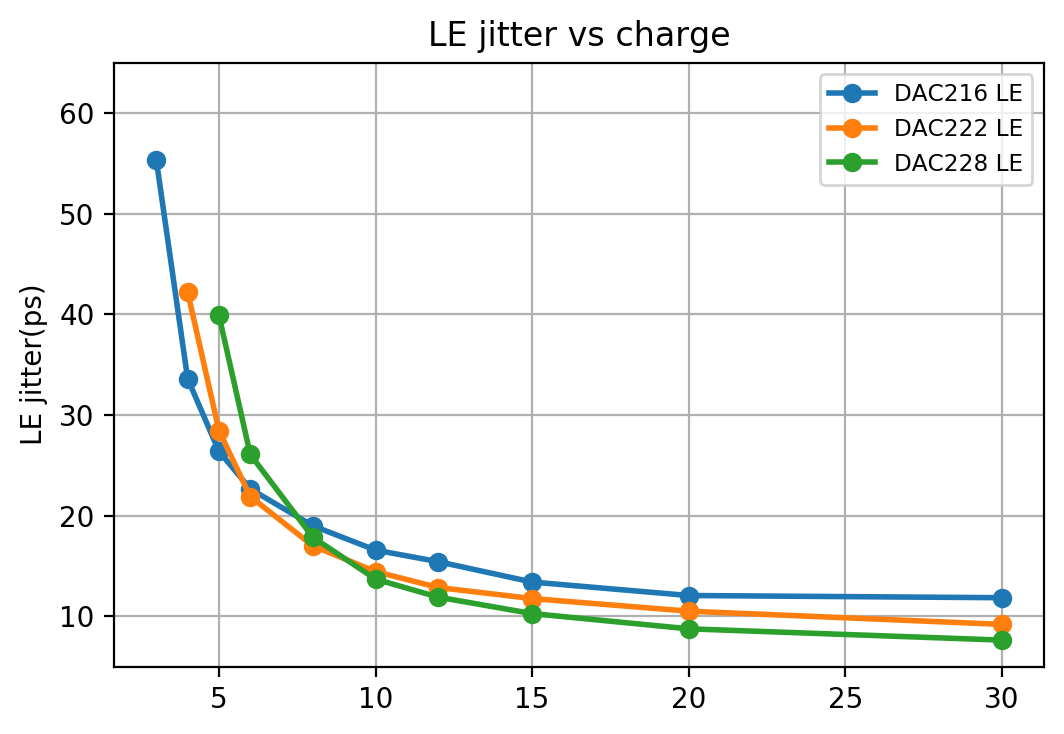

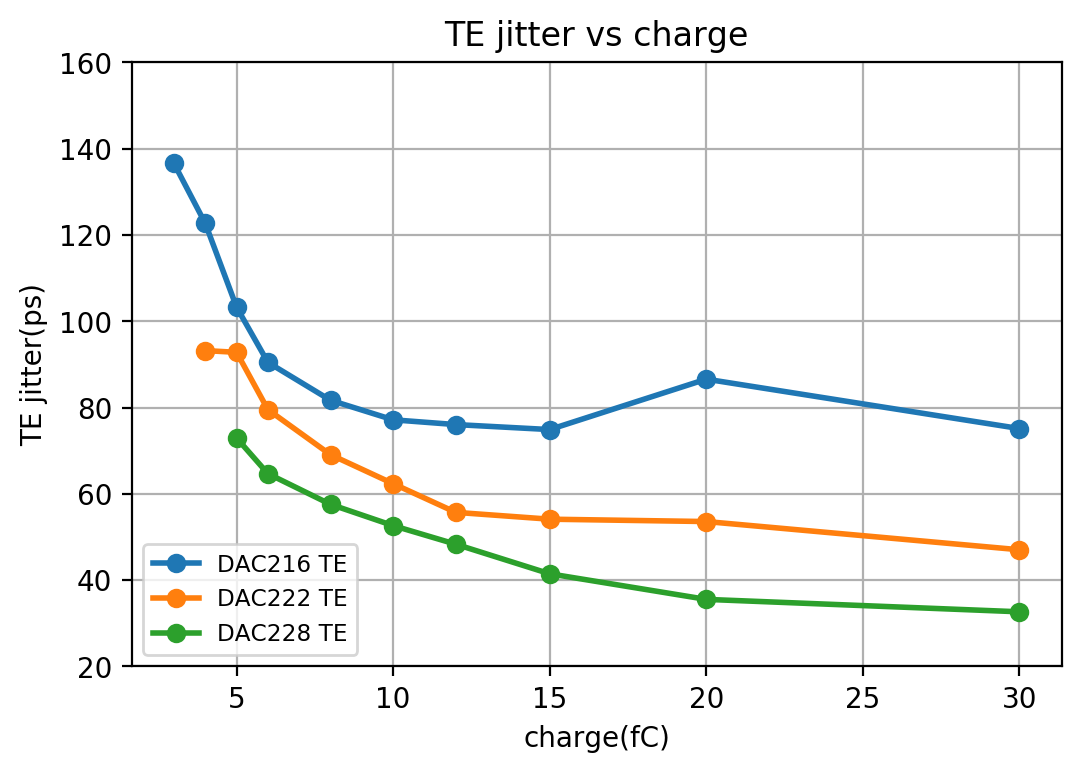

In [6]:
# ############## plot  ###############
# charge_DAC216_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
# charge_DAC222_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]
# charge_DAC228_list = [5, 6, 8, 10, 12, 15, 20, 30]
# std_t_discri_le_notrig_DAC216_list = [55.081312393576745, 33.5965400004161, 26.05374253345816, 
#                                       22.5273605866244, 18.81562582004275, 16.048937659543025, 
#                                       14.973709460247598, 12.898332256533537, 11.479982578381783, 11.415248573725846]
# std_t_discri_le_notrig_DAC222_list = [42.264784099759545, 28.33616770136146, 21.60300904966283, 
#                                       16.700071856129487, 13.96251768127515, 12.108030393087999, 
#                                       11.495519779459704, 9.761443284676796, 8.225442237349645]
# std_t_discri_le_notrig_DAC228_list = [39.770094292060314, 25.770479234964462, 17.58708617138944, 
#                                       12.937893955351925, 11.500642373361078, 9.781051835051402, 
#                                       8.127113571248723, 6.910352740633446]
# std_t_discri_te_notrig_DAC216_list = [136.65975623786466, 122.6894763212966, 103.3189768386996, 90.44033171100575, 
#                                       81.6119952886667, 77.18469391658961, 76.21657037677367, 74.75354439755857, 
#                                       86.70760851849761, 75.30381115851816]
# std_t_discri_te_notrig_DAC222_list = [93.108323473235, 92.4764801179013, 79.38929398853153, 69.01791361666994, 
#                                       62.30979838675822, 55.75950838196793, 53.888606402456176, 53.476577816824374, 
#                                       46.899221475405405]
# std_t_discri_te_notrig_DAC228_list = [72.6907146752451, 64.6289903990334, 57.5737361997525, 52.33364859245829, 
#                                       48.11770568095566, 41.1854947159715, 35.37269427113945, 32.352959292769185]

fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(charge_DAC216_list, std_t_discri_le_notrig_DAC216_list, 'o-', linewidth=2,  label="DAC216 LE")
ax1.plot(charge_DAC222_list, std_t_discri_le_notrig_DAC222_list, 'o-', linewidth=2,  label="DAC222 LE")
ax1.plot(charge_DAC228_list, std_t_discri_le_notrig_DAC228_list, 'o-', linewidth=2,  label="DAC228 LE")

ax1.set(ylabel='LE jitter(ps)',
       title='LE jitter vs charge')

ax1.set_ylim(bottom=5,top=65)
ax1.grid(which='both')
ax1.legend(loc = 'upper right', fontsize = 'small')
plt.show()

fig2,ax2 = plt.subplots(dpi=200)
ax2.plot(charge_DAC216_list, std_t_discri_te_notrig_DAC216_list, 'o-', linewidth=2,  label="DAC216 TE")
ax2.plot(charge_DAC222_list, std_t_discri_te_notrig_DAC222_list, 'o-', linewidth=2,  label="DAC222 TE")
ax2.plot(charge_DAC228_list, std_t_discri_te_notrig_DAC228_list, 'o-', linewidth=2,  label="DAC228 TE")

ax2.set(xlabel='charge(fC)', ylabel='TE jitter(ps)',
       title='TE jitter vs charge')
ax2.set_ylim(bottom=20,top=160)
ax2.grid(which='both')
ax2.legend(loc = 'lower left', fontsize = 'small')
plt.show()



In [7]:
plot_detail=False

if plot_detail==True:

    ############################### plot  ######################################
    # path_plot = './'
    # pp = PdfPages(path_plot+"plots_DGDP"+".pdf")
    
    
    # plot_details = False
    plot_details = True
    
    charge_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
    q_ideal_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
    
    # ######### plot text box #####
    # fig0, ax0 = plt.subplots(dpi=200)
    # props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # ax0.text(0.05, 0.95, textstr, transform=ax0.transAxes, fontsize=12,
    #         verticalalignment='top', bbox=props)
    # ax0.set_xlim(left=0,right=50)
    # ax0.set_ylim(bottom=0,top=50)
    # plt.show()
    # plt.close(fig0)
    
    ######### plot measured charge vs input charge  ######
    fig1, ax1 = plt.subplots(dpi=200)
    ax1.plot(charge_DAC216_list, mean_q_DAC216_list, 'o', label = 'DAC216 Charge')
    ax1.plot(charge_DAC216_list, q_ideal_list, 'o', label = 'input charge')
    # ax1.plot(charge_DAC222_list, mean_q_DAC222_list, 'o', label = 'DAC222 Charge')
    # ax1.plot(charge_DAC228_list, mean_q_DAC228_list, 'o', label = 'DAC228 Charge')
    ax1.set(xlabel='charge in(fC)', ylabel='charge measured(fC)',
           title='measured charge vs input charge')
    ax1.legend(loc = 'upper left', fontsize = 'small')
    ax1.grid(which='both')
    plt.show()
    plt.close(fig1)
    
    
    if plot_details == True:
        #### plot charge  ###########
        for index in range(0, len(charge_DAC216_list)):
            etroc0_benchtest.plot_distribution_charge_gaus(q_ch1_DAC216_list[index], file_item='test file', 
                                                   num_bins= 30, range_default = None, xaxis = 'Charge (fC)',
                                                      ylable = 'Occurrence', title = str(charge_DAC216_list[index])+'fC', 
                                                           pic = True, pdf = False)
    
    if plot_details == True:
        ###### plot trigger timing #############
        for index in range(0, len(charge_list)):
            etroc0_benchtest.plot_distribution_time(t_trigger_DAC216_list[index], file_item='test file', 
                                                    num_bins= 30, range_default = None, xaxis = 'Time Resolution(ns)',
                                                    ylable = 'Occurrence', title = 'Trigger Jitter at '+ str(charge_list[index]) + 'fC', 
                                                    pic = True, pdf = False)
    
    if plot_details == True:
        ###### plot discri timing #########
        for index in range(0, len(charge_DAC216_list)):
            etroc0_benchtest.plot_distribution_time(t_discri_le_notrig_DAC216_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri LE jitter at '+ str(charge_DAC216_list[index]) + 'fC' + '/DAC216', 
                                                    pic = True, pdf = False)
            etroc0_benchtest.plot_distribution_time(t_discri_te_notrig_DAC216_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri TE jitter at '+ str(charge_DAC216_list[index]) + 'fC' + '/DAC216', 
                                                    pic = True, pdf = False)
        for index in range(0, len(charge_DAC222_list)):
            etroc0_benchtest.plot_distribution_time(t_discri_le_notrig_DAC222_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri LE jitter at '+ str(charge_DAC222_list[index]) + 'fC' + '/DAC222', 
                                                    pic = True, pdf = False)
            etroc0_benchtest.plot_distribution_time(t_discri_te_notrig_DAC222_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri TE jitter at '+ str(charge_DAC222_list[index]) + 'fC' + '/DAC222', 
                                                    pic = True, pdf = False)
        for index in range(0, len(charge_DAC228_list)):
            etroc0_benchtest.plot_distribution_time(t_discri_le_notrig_DAC228_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri LE jitter at '+ str(charge_DAC228_list[index]) + 'fC' + '/DAC228', 
                                                    pic = True, pdf = False)
            etroc0_benchtest.plot_distribution_time(t_discri_te_notrig_DAC228_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri TE jitter at '+ str(charge_DAC228_list[index]) + 'fC' + '/DAC228', 
                                                    pic = True, pdf = False)
            
    
    # pp.close()
else:
    print('plot_detail is disabled')

plot_detail is disabled


length of DAC216 list is 10
9000
1.9989999999999961
6.42099999999999


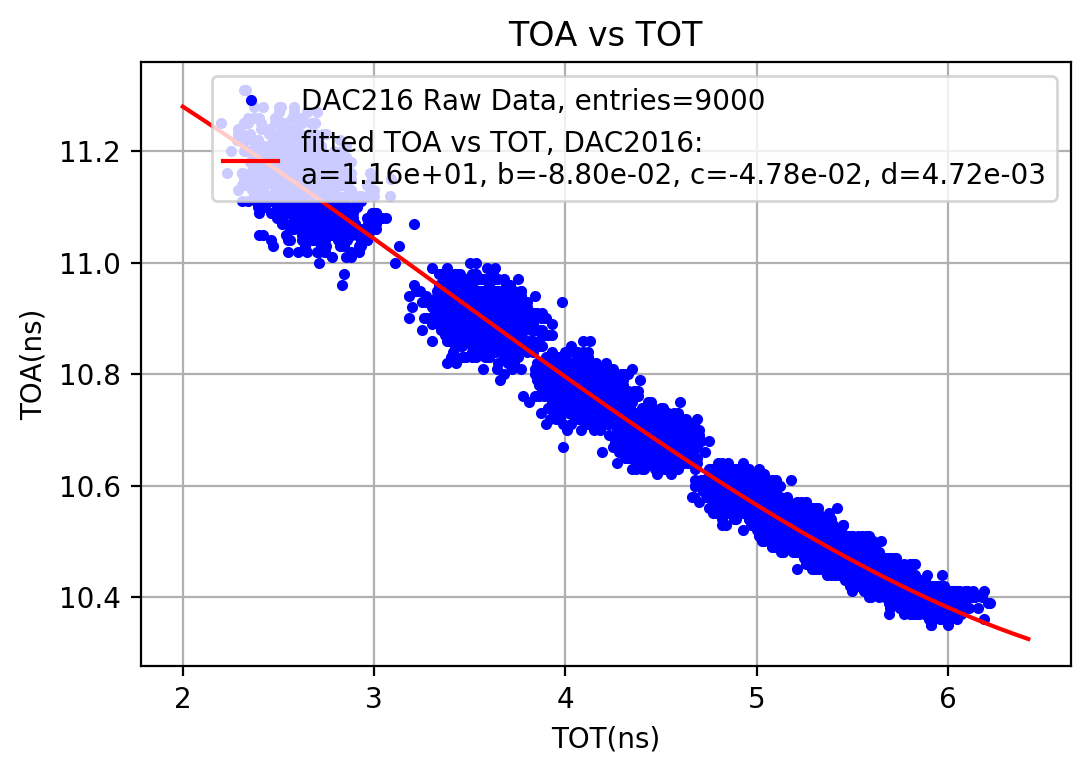

toa_DAC216_corrected is  9000


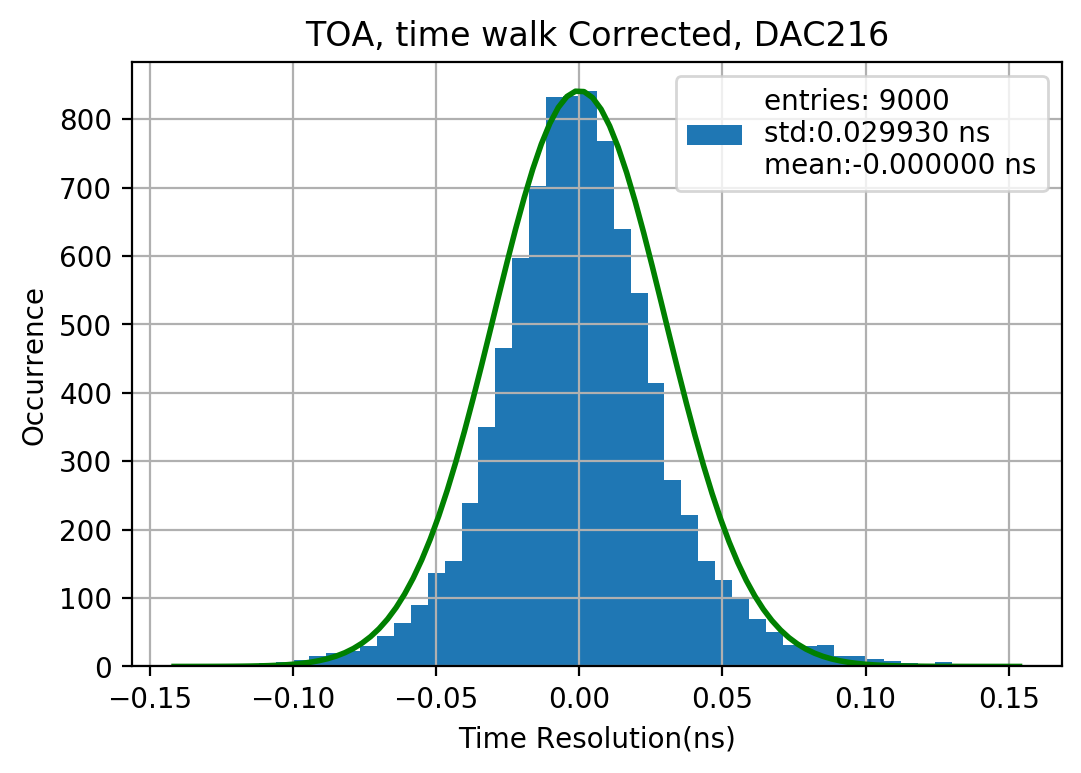

1.9989999999999961
6.42099999999999


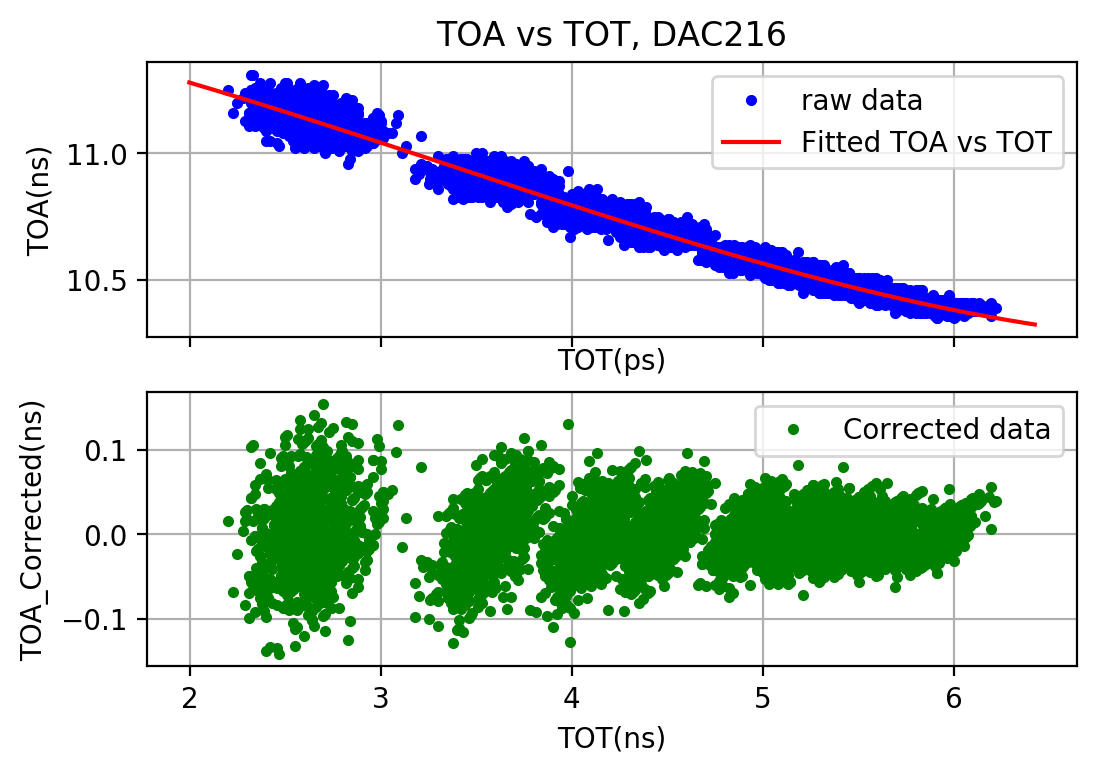

In [82]:
polynomial_4th = True
# polynomial_4th = False

# LindseyFit = True
LindseyFit = False
# SciFit = True       #scipy fitting with normal distribution
SciFit = False      #scipy unbiased standard deviation

############### Time Walk Calibration  DAC216 ##################

length_DAC216_le = len(t_discri_le_notrig_DAC216_list)
print('length of DAC216 list is', length_DAC216_le)

le_DAC216 = t_discri_le_notrig_DAC216_list[0] + t_discri_le_notrig_DAC216_list[1] + \
                t_discri_le_notrig_DAC216_list[2] + t_discri_le_notrig_DAC216_list[3] + \
                t_discri_le_notrig_DAC216_list[4] + t_discri_le_notrig_DAC216_list[5] + \
                t_discri_le_notrig_DAC216_list[6] + t_discri_le_notrig_DAC216_list[7] + \
                t_discri_le_notrig_DAC216_list[8]
te_DAC216 = t_discri_te_notrig_DAC216_list[0] + t_discri_te_notrig_DAC216_list[1] + \
                t_discri_te_notrig_DAC216_list[2] + t_discri_te_notrig_DAC216_list[3] + \
                t_discri_te_notrig_DAC216_list[4] + t_discri_te_notrig_DAC216_list[5] + \
                t_discri_te_notrig_DAC216_list[6] + t_discri_te_notrig_DAC216_list[7] + \
                t_discri_te_notrig_DAC216_list[8]

print(len(te_DAC216))

le_DAC216 = np.array(le_DAC216)
te_DAC216 = np.array(te_DAC216)

length_DAC216 = len(te_DAC216)

tot_DAC216 = te_DAC216 - le_DAC216

if polynomial_4th == True:
    popt_toa_DAC216, pcov_toa_DAC216 = curve_fit(etroc0_benchtest.func1, tot_DAC216, le_DAC216)
else:
    popt_toa_DAC216, pcov_toa_DAC216 = curve_fit(etroc0_benchtest.func0, tot_DAC216, le_DAC216)



fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(tot_DAC216, le_DAC216, 'b.', label='DAC216 Raw Data, entries=%d'%(length_DAC216))

#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax1.plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC216), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa_DAC216))
else:
    ax1.plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC216), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e' % tuple(popt_toa_DAC216))

ax1.set(xlabel='TOT(ns)', ylabel='TOA(ns)',
       title='TOA vs TOT')
# ax1.set_ylim(bottom=3000,top=7000)

ax1.grid()
ax1.legend()
plt.show()


#################################
#time walk correction and fit
#################################



# Generate data 
if polynomial_4th == True:
    toa_DAC216_fitted=etroc0_benchtest.func1(tot_DAC216, *popt_toa_DAC216)
else:
    toa_DAC216_fitted=etroc0_benchtest.func0(tot_DAC216, *popt_toa_DAC216)

toa_DAC216_corrected = le_DAC216 - toa_DAC216_fitted

print('toa_DAC216_corrected is ',len(toa_DAC216_corrected))

if LindseyFit == True:
    etroc0_benchtest.plot_distribution_time_Lindsey(toa_DAC216_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC216', pic = True, pdf = False)
else:
    if SciFit == True:
        etroc0_benchtest.plot_distribution_time(toa_DAC216_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC216', pic = True, pdf = False)
    else:
        etroc0_benchtest.plot_distribution_time_nofit(toa_DAC216_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC216', pic = True, pdf = False)


######################## plot demo #################################

#print orginal data
fig5,ax5 = plt.subplots(2,1,sharex=True,dpi=200)
ax5[0].plot(tot_DAC216, le_DAC216, 'b.', label='raw data')


#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax5[0].plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC216), 'r-', label='Fitted TOA vs TOT')
else:
    ax5[0].plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC216), 'r-', label='Fitted TOA vs TOT')



ax5[0].set(xlabel='TOT(ps)', ylabel='TOA(ns)',
       title='TOA vs TOT, DAC216')
ax5[0].grid()
ax5[0].legend()

ax5[1].plot(tot_DAC216, toa_DAC216_corrected,'g.', label='Corrected data')
ax5[1].set(xlabel='TOT(ns)', ylabel='TOA_Corrected(ns)')
# ax5[1].set_ylim(-500, 500)
# ax5[1].hist(toa_DAC216_corrected, orientation='horizontal', density = True)
ax5[1].grid()
ax5[1].legend()

plt.show()

11.13512
[2.638539999999992, 3.567219999999993, 4.094829999999994, 4.4669999999999925, 4.911259999999994, 5.198309999999993, 5.407249999999994, 5.630779999999995, 5.899209999999994]
[11.13512, 10.90185, 10.76997, 10.683960000000003, 10.587720000000001, 10.526230000000002, 10.482240000000001, 10.439490000000001, 10.393900000000004]
[ 0.00403156  0.00013007 -0.00210135  0.0001624   0.00355073  0.00201568
 -0.00097485 -0.00265429 -0.00317471]


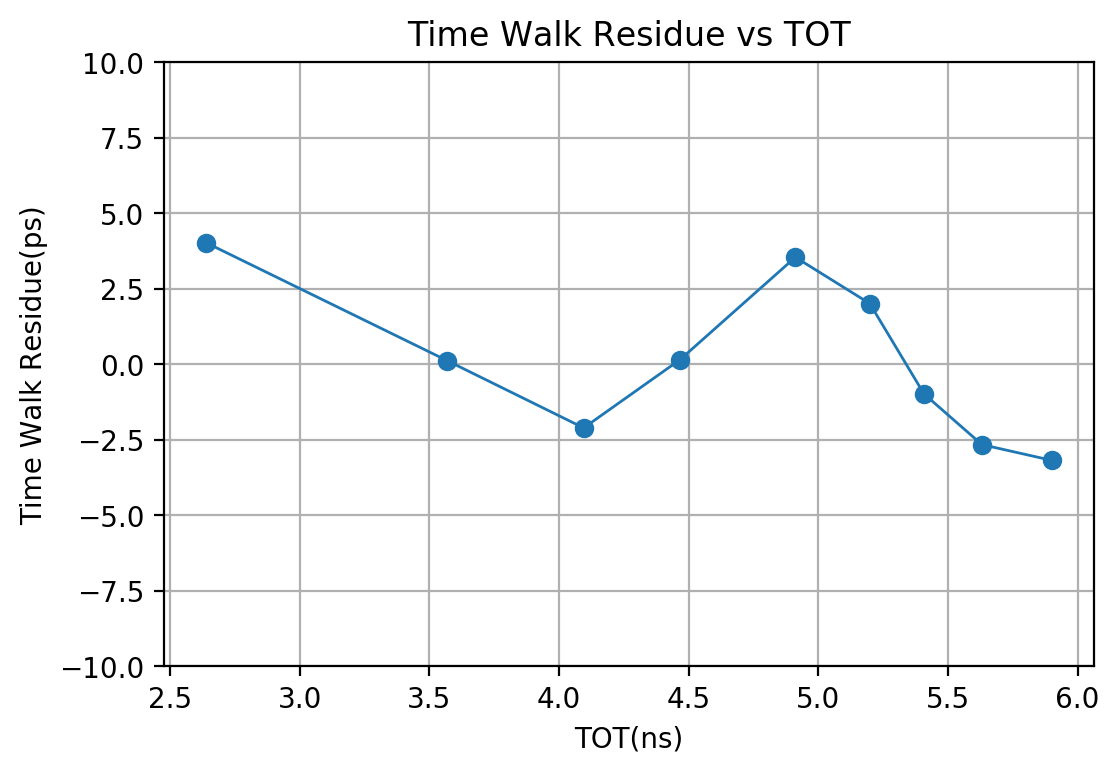

1.9989999999999961
6.42099999999999


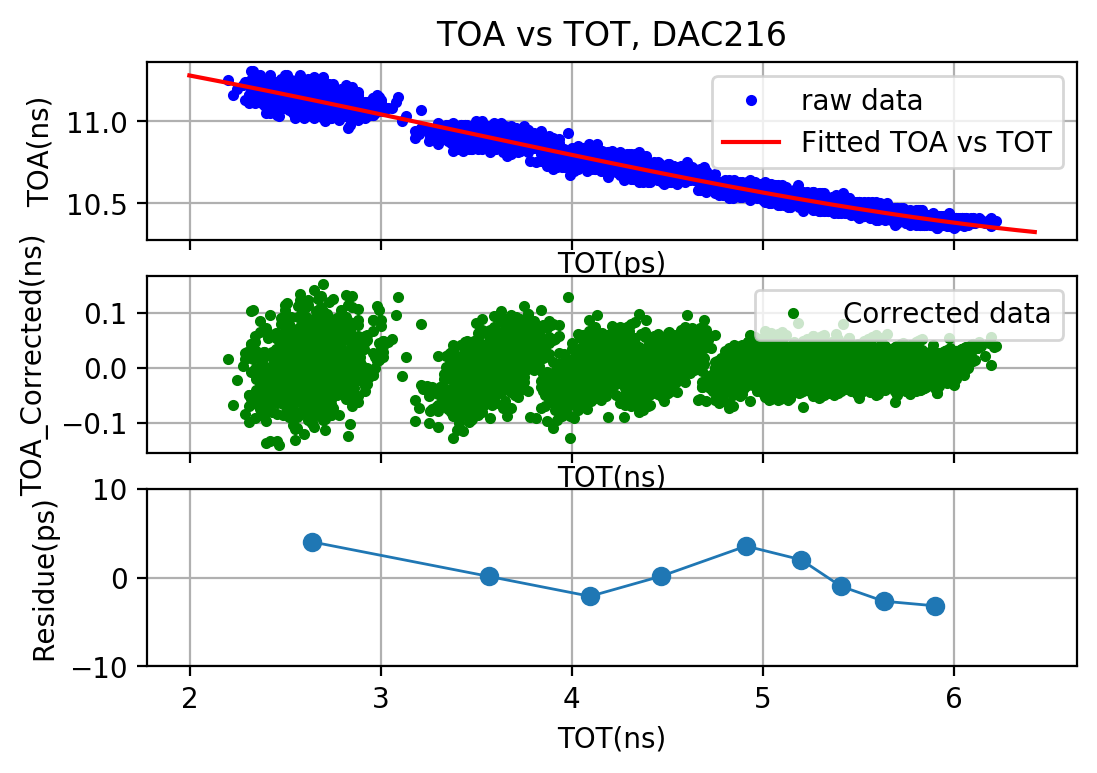

In [87]:
t_discri_le_grouped_DAC216_list = []
t_discri_te_grouped_DAC216_list = []
t_discri_tot_grouped_DAC216_list = []
for i in range(9):
#     print(i)
    t_discri_le_grouped_DAC216_list.append(np.mean(t_discri_le_notrig_DAC216_list[i])) 
    t_discri_te_grouped_DAC216_list.append(np.mean(t_discri_te_notrig_DAC216_list[i]))
    t_discri_tot_grouped_DAC216_list.append(np.mean(np.array(t_discri_te_notrig_DAC216_list[i]) - 
                                            np.array(t_discri_le_notrig_DAC216_list[i])))

print(np.mean(t_discri_le_notrig_DAC216_list[0]))
print(t_discri_tot_grouped_DAC216_list)
print(t_discri_le_grouped_DAC216_list)

toa_mu_DAC216 = np.array(t_discri_le_grouped_DAC216_list)
tot_mu_DAC216 = np.array(t_discri_tot_grouped_DAC216_list)

if polynomial_4th == True:
    toa_mu_DAC216_fitted=etroc0_benchtest.func1(tot_mu_DAC216, *popt_toa_DAC216)
else:
    toa_mu_DAC216_fitted=etroc0_benchtest.func0(tot_mu_DAC216, *popt_toa_DAC216)
    
toa_mu_DAC216_corrected = toa_mu_DAC216 - toa_mu_DAC216_fitted

print(toa_mu_DAC216_corrected)

toa_mu_DAC216_corrected_ps = toa_mu_DAC216_corrected*1000
######################## plot residue #################################

#print orginal data
fig5,ax5 = plt.subplots(dpi=200)
ax5.plot(tot_mu_DAC216, toa_mu_DAC216_corrected_ps, marker='o', linestyle='-', linewidth=1)


ax5.set(xlabel='TOT(ns)', ylabel='Time Walk Residue(ps)',
       title='Time Walk Residue vs TOT')

ax5.set_ylim(bottom=-10,top=10)
ax5.grid()
# ax5.legend()

plt.show()



######################## plot demo including residue #################################

#print orginal data
fig5,ax5 = plt.subplots(3,1,sharex=True,dpi=200)
ax5[0].plot(tot_DAC216, le_DAC216, 'b.', label='raw data')


#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax5[0].plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC216), 'r-', label='Fitted TOA vs TOT')
else:
    ax5[0].plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC216), 'r-', label='Fitted TOA vs TOT')



ax5[0].set(xlabel='TOT(ps)', ylabel='TOA(ns)',
       title='TOA vs TOT, DAC216')
ax5[0].grid()
ax5[0].legend()

ax5[1].plot(tot_DAC216, toa_DAC216_corrected,'g.', label='Corrected data')
ax5[1].set(xlabel='TOT(ns)', ylabel='TOA_Corrected(ns)')
# ax5[1].set_ylim(-500, 500)
# ax5[1].hist(toa_DAC216_corrected, orientation='horizontal', density = True)
ax5[1].grid()
ax5[1].legend()

ax5[2].plot(tot_mu_DAC216, toa_mu_DAC216_corrected_ps, marker='o', linestyle='-', linewidth=1)


ax5[2].set(xlabel='TOT(ns)', ylabel='Residue(ps)',
       title='')

ax5[2].set_ylim(bottom=-10,top=10)
ax5[2].grid()

plt.show()

df = pd.DataFrame(list(zip(toa_mu_DAC216_corrected_ps, tot_mu_DAC216)), 
               columns =['residue(ps)', 'tot(ns)']) 

df1 = pd.DataFrame(list(zip(le_DAC216, tot_DAC216)), 
               columns =['toa(ns)', 'tot(ns)']) 

df2 = pd.DataFrame(list(zip(toa_DAC216_corrected, tot_DAC216)), 
               columns =['toa(ns)', 'tot(ns)']) 

df.to_excel("data/residule.xlsx",
             sheet_name='Sheet')

df1.to_excel("data/uncorrected.xlsx",
             sheet_name='Sheet')

df1.to_excel("data/corrected.xlsx",
             sheet_name='Sheet')

length of DAC222 list is 9
8000
2.0324999999999958
5.717499999999993


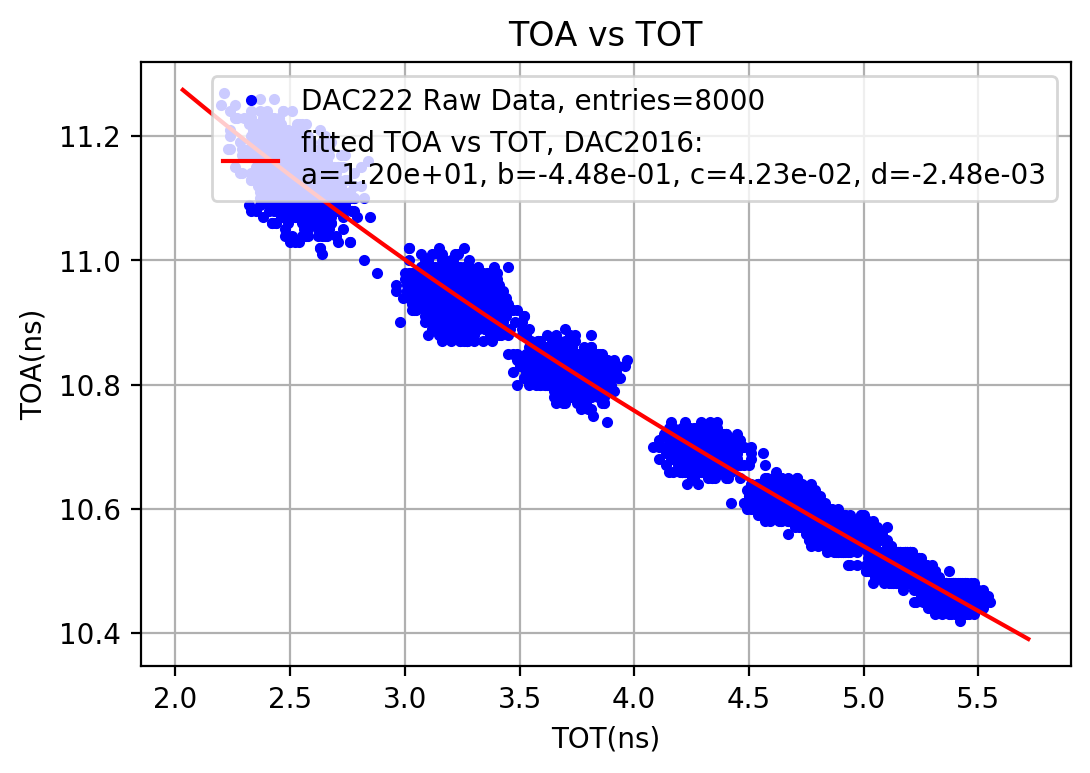

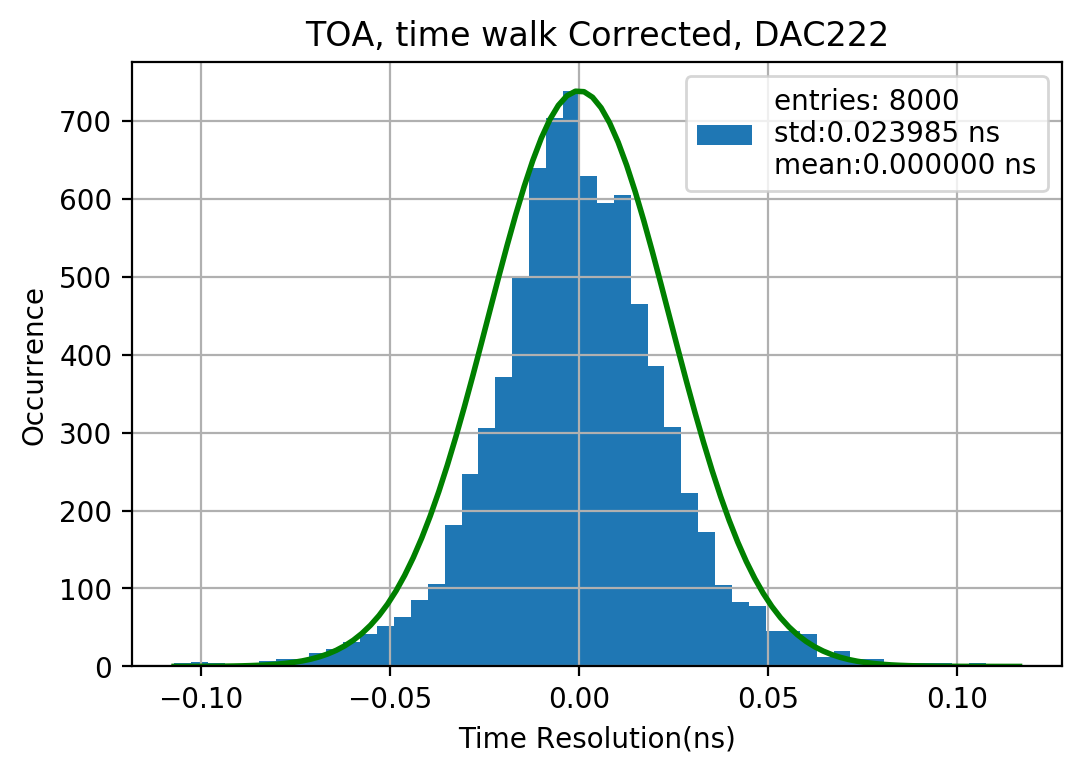

2.0324999999999958
5.717499999999993


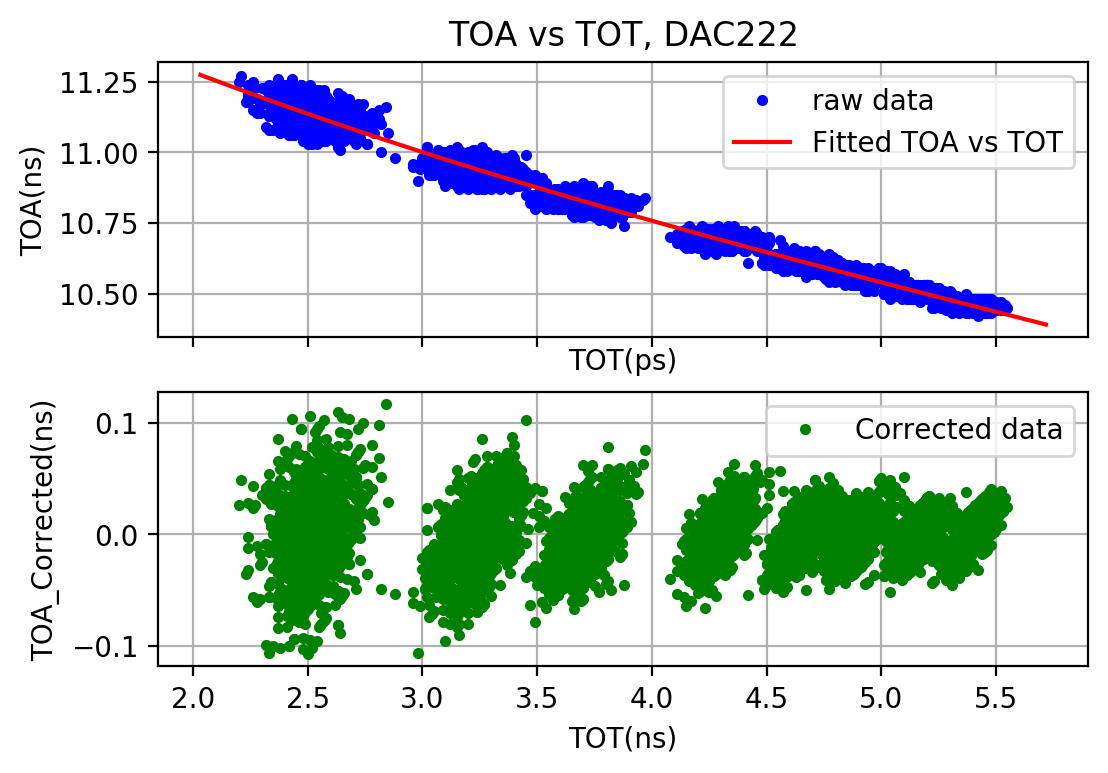

In [9]:
polynomial_4th = True
# polynomial_4th = False

# LindseyFit = True
LindseyFit = False
# SciFit = True       #scipy fitting with normal distribution
SciFit = False      #scipy unbiased standard deviation

############### Time Walk Calibration  DAC222 ##################

length_DAC222_le = len(t_discri_le_notrig_DAC222_list)
print('length of DAC222 list is', length_DAC222_le)

le_DAC222 = t_discri_le_notrig_DAC222_list[0] + t_discri_le_notrig_DAC222_list[1] + \
                t_discri_le_notrig_DAC222_list[2] + t_discri_le_notrig_DAC222_list[3] + \
                t_discri_le_notrig_DAC222_list[4] + t_discri_le_notrig_DAC222_list[5] + \
                t_discri_le_notrig_DAC222_list[6] + t_discri_le_notrig_DAC222_list[7]
te_DAC222 = t_discri_te_notrig_DAC222_list[0] + t_discri_te_notrig_DAC222_list[1] + \
                t_discri_te_notrig_DAC222_list[2] + t_discri_te_notrig_DAC222_list[3] + \
                t_discri_te_notrig_DAC222_list[4] + t_discri_te_notrig_DAC222_list[5] + \
                t_discri_te_notrig_DAC222_list[6] + t_discri_te_notrig_DAC222_list[7] 

print(len(te_DAC222))

le_DAC222 = np.array(le_DAC222)
te_DAC222 = np.array(te_DAC222)

length_DAC222 = len(te_DAC222)

tot_DAC222 = te_DAC222 - le_DAC222

if polynomial_4th == True:
    popt_toa_DAC222, pcov_toa_DAC222 = curve_fit(etroc0_benchtest.func1, tot_DAC222, le_DAC222)
else:
    popt_toa_DAC222, pcov_toa_DAC222 = curve_fit(etroc0_benchtest.func0, tot_DAC222, le_DAC222)



fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(tot_DAC222, le_DAC222, 'b.', label='DAC222 Raw Data, entries=%d'%(length_DAC222))

#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax1.plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC222), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa_DAC222))
else:
    ax1.plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC222), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e' % tuple(popt_toa_DAC222))

ax1.set(xlabel='TOT(ns)', ylabel='TOA(ns)',
       title='TOA vs TOT')
# ax1.set_ylim(bottom=3000,top=7000)

ax1.grid()
ax1.legend()
plt.show()


#################################
#time walk correction and fit
#################################



# Generate data 
if polynomial_4th == True:
    toa_DAC222_fitted=etroc0_benchtest.func1(tot_DAC222, *popt_toa_DAC222)
else:
    toa_DAC222_fitted=etroc0_benchtest.func0(tot_DAC222, *popt_toa_DAC222)

toa_DAC222_corrected = le_DAC222 - toa_DAC222_fitted

if LindseyFit == True:
    etroc0_benchtest.plot_distribution_time_Lindsey(toa_DAC222_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC222', pic = True, pdf = False)
else:
    if SciFit == True:
        etroc0_benchtest.plot_distribution_time(toa_DAC222_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC222', pic = True, pdf = False)
    else:
        etroc0_benchtest.plot_distribution_time_nofit(toa_DAC222_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC222', pic = True, pdf = False)


######################## plot demo #################################

#print orginal data
fig5,ax5 = plt.subplots(2,1,sharex=True,dpi=200)
ax5[0].plot(tot_DAC222, le_DAC222, 'b.', label='raw data')


#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax5[0].plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC222), 'r-', label='Fitted TOA vs TOT')
else:
    ax5[0].plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC222), 'r-', label='Fitted TOA vs TOT')



ax5[0].set(xlabel='TOT(ps)', ylabel='TOA(ns)',
       title='TOA vs TOT, DAC222')
ax5[0].grid()
ax5[0].legend()

ax5[1].plot(tot_DAC222, toa_DAC222_corrected,'g.', label='Corrected data')
ax5[1].set(xlabel='TOT(ns)', ylabel='TOA_Corrected(ns)')
# ax5[1].set_ylim(-500, 500)
# ax5[1].hist(toa_DAC222_corrected, orientation='horizontal', density = True)
ax5[1].grid()
ax5[1].legend()

plt.show()

length of DAC228 list is 8
7000
1.599499999999987
5.130499999999992


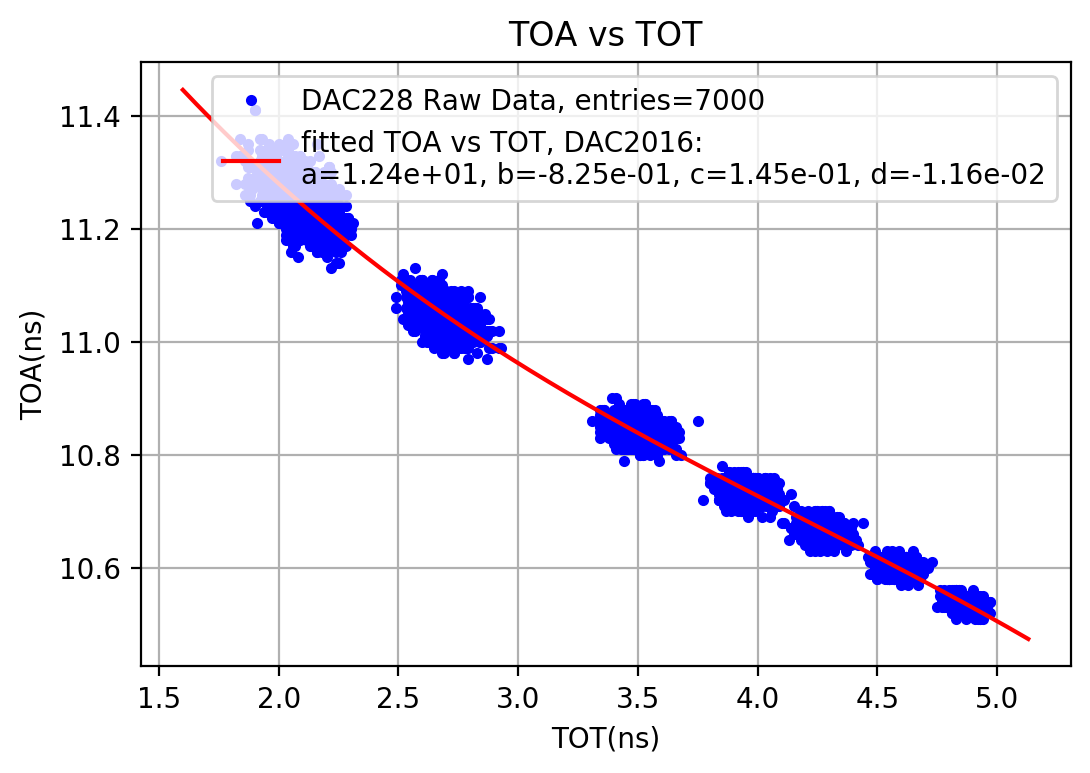

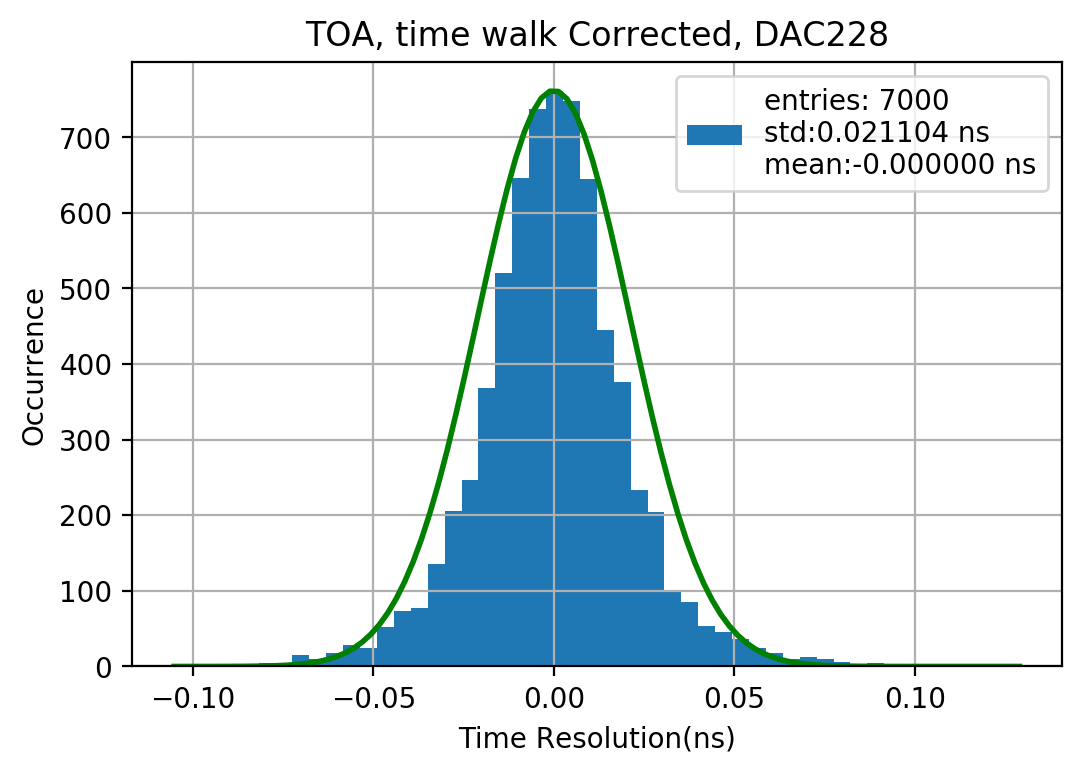

1.599499999999987
5.130499999999992


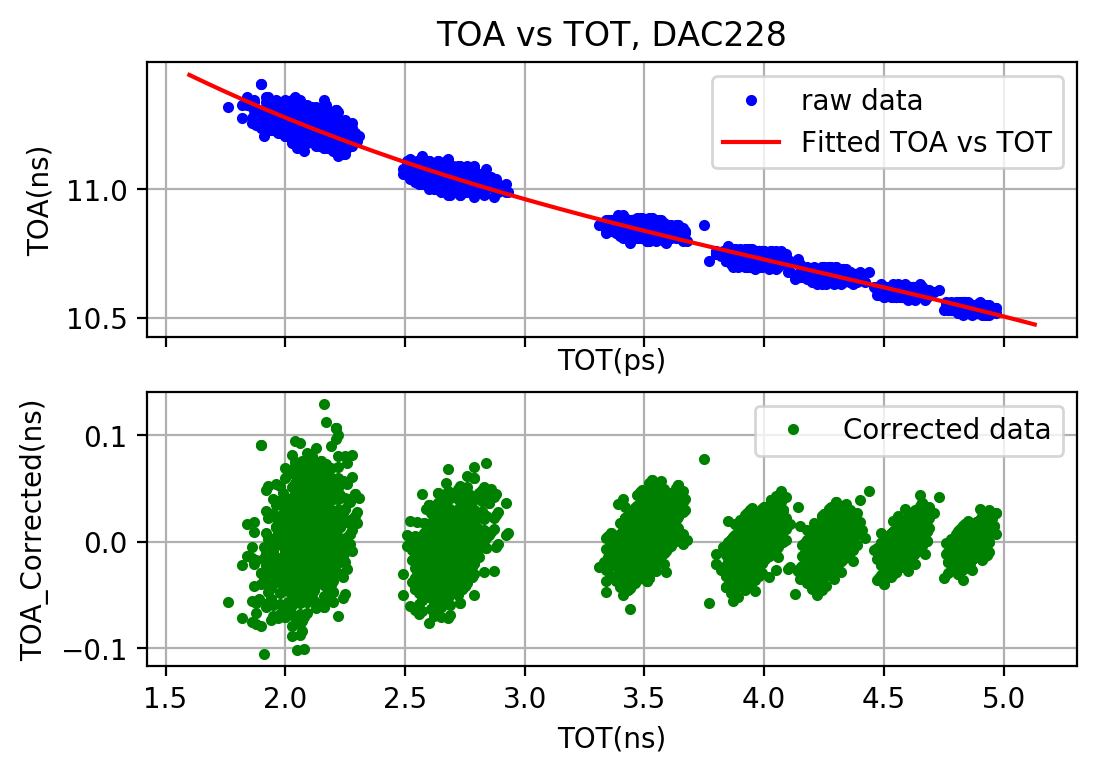

In [10]:
polynomial_4th = True
# polynomial_4th = False

# LindseyFit = True
LindseyFit = False
# SciFit = True       #scipy fitting with normal distribution
SciFit = False      #scipy unbiased standard deviation

############### Time Walk Calibration  DAC228 ##################

length_DAC228_le = len(t_discri_le_notrig_DAC228_list)
print('length of DAC228 list is', length_DAC228_le)

le_DAC228 = t_discri_le_notrig_DAC228_list[0] + t_discri_le_notrig_DAC228_list[1] + \
                t_discri_le_notrig_DAC228_list[2] + t_discri_le_notrig_DAC228_list[3] + \
                t_discri_le_notrig_DAC228_list[4] + t_discri_le_notrig_DAC228_list[5] + \
                t_discri_le_notrig_DAC228_list[6] 
te_DAC228 = t_discri_te_notrig_DAC228_list[0] + t_discri_te_notrig_DAC228_list[1] + \
                t_discri_te_notrig_DAC228_list[2] + t_discri_te_notrig_DAC228_list[3] + \
                t_discri_te_notrig_DAC228_list[4] + t_discri_te_notrig_DAC228_list[5] + \
                t_discri_te_notrig_DAC228_list[6] 

print(len(te_DAC228))

le_DAC228 = np.array(le_DAC228)
te_DAC228 = np.array(te_DAC228)

length_DAC228 = len(te_DAC228)

tot_DAC228 = te_DAC228 - le_DAC228

if polynomial_4th == True:
    popt_toa_DAC228, pcov_toa_DAC228 = curve_fit(etroc0_benchtest.func1, tot_DAC228, le_DAC228)
else:
    popt_toa_DAC228, pcov_toa_DAC228 = curve_fit(etroc0_benchtest.func0, tot_DAC228, le_DAC228)



fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(tot_DAC228, le_DAC228, 'b.', label='DAC228 Raw Data, entries=%d'%(length_DAC228))

#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax1.plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC228), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa_DAC228))
else:
    ax1.plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC228), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e' % tuple(popt_toa_DAC228))

ax1.set(xlabel='TOT(ns)', ylabel='TOA(ns)',
       title='TOA vs TOT')
# ax1.set_ylim(bottom=3000,top=7000)

ax1.grid()
ax1.legend()
plt.show()


#################################
#time walk correction and fit
#################################



# Generate data 
if polynomial_4th == True:
    toa_DAC228_fitted=etroc0_benchtest.func1(tot_DAC228, *popt_toa_DAC228)
else:
    toa_DAC228_fitted=etroc0_benchtest.func0(tot_DAC228, *popt_toa_DAC228)

toa_DAC228_corrected = le_DAC228 - toa_DAC228_fitted

if LindseyFit == True:
    etroc0_benchtest.plot_distribution_time_Lindsey(toa_DAC228_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC228', pic = True, pdf = False)
else:
    if SciFit == True:
        etroc0_benchtest.plot_distribution_time(toa_DAC228_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC228', pic = True, pdf = False)
    else:
        etroc0_benchtest.plot_distribution_time_nofit(toa_DAC228_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC228', pic = True, pdf = False)


######################## plot demo #################################

#print orginal data
fig5,ax5 = plt.subplots(2,1,sharex=True,dpi=200)
ax5[0].plot(tot_DAC228, le_DAC228, 'b.', label='raw data')


#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax5[0].plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC228), 'r-', label='Fitted TOA vs TOT')
else:
    ax5[0].plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC228), 'r-', label='Fitted TOA vs TOT')



ax5[0].set(xlabel='TOT(ps)', ylabel='TOA(ns)',
       title='TOA vs TOT, DAC228')
ax5[0].grid()
ax5[0].legend()

ax5[1].plot(tot_DAC228, toa_DAC228_corrected,'g.', label='Corrected data')
ax5[1].set(xlabel='TOT(ns)', ylabel='TOA_Corrected(ns)')
# ax5[1].set_ylim(-500, 500)
# ax5[1].hist(toa_DAC228_corrected, orientation='horizontal', density = True)
ax5[1].grid()
ax5[1].legend()

plt.show()